In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# TensorFlow 사용하기

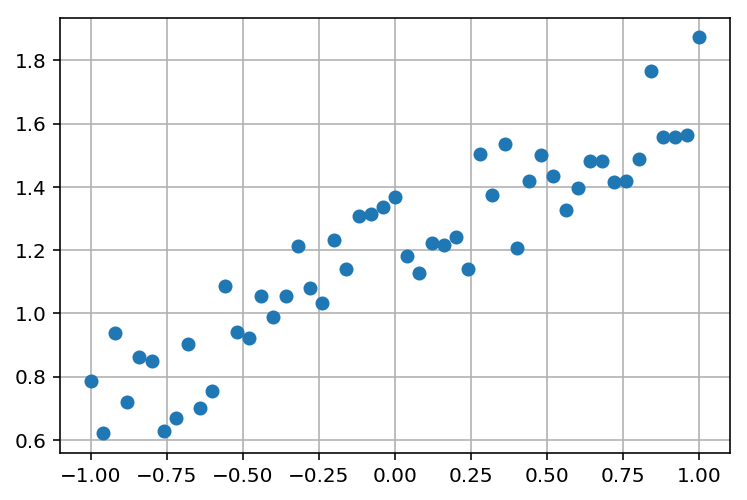

In [2]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

plt.plot(x_train, y_train, 'o')
plt.grid()
plt.show()

# Gradient Descent

In [3]:
# Weights(Control Varaible)
w = tf.Variable(-1.0, dtype=tf.float32)
b = tf.Variable(-1.0, dtype=tf.float32)

# Placeholder for Dataset
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Loss function
loss = tf.reduce_sum(tf.square(w * x + b - y))

# Numerical Optimizer
lr = 0.01
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [4]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    # Initialize all Variables
    sess.run(init)
    for epoch in range(25):
        if epoch % 5 == 0:
            # Get w, b, loss
            curr_w, curr_b, curr_loss = sess.run([w, b, loss], feed_dict={x:x_train, y:y_train})
            print(curr_w, curr_b, curr_loss)
        # Do a step of Gradient Descent Method(tf.train.GradientDescentOptimizer)
        sess.run(train, feed_dict={x:x_train, y:y_train})
    # Get updated Weights
    w_tf_gd, b_tf_gd = sess.run([w, b])

-1.0 -1.0 284.45255
0.3014311 1.1949914 1.1717727
0.44829938 1.1949914 0.6933859
0.46487367 1.1949914 0.6872935
0.4667441 1.1949914 0.687216


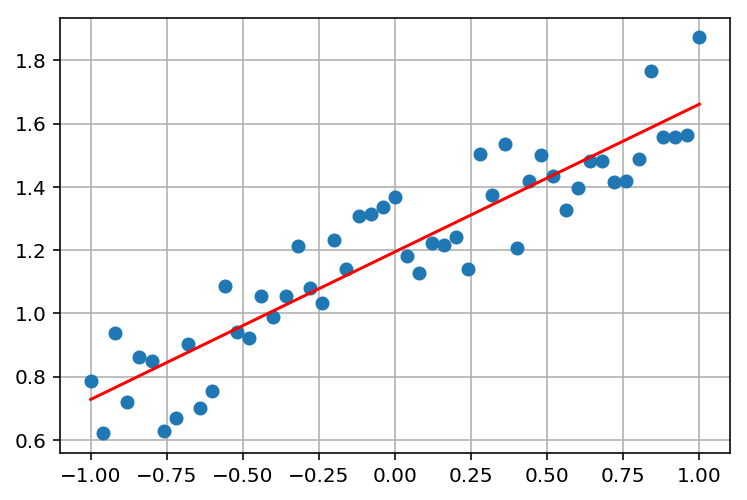

In [5]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, w_tf_gd * x_train + b_tf_gd, 'r-')
plt.grid()
plt.show()

# scikit-learn 사용하기

In [6]:
from sklearn import linear_model

In [7]:
reg = linear_model.LinearRegression()
reg.fit (x_train.reshape(-1,1), y_train)
print(reg.coef_, reg.intercept_)

[0.46698201] 1.1949913262130298


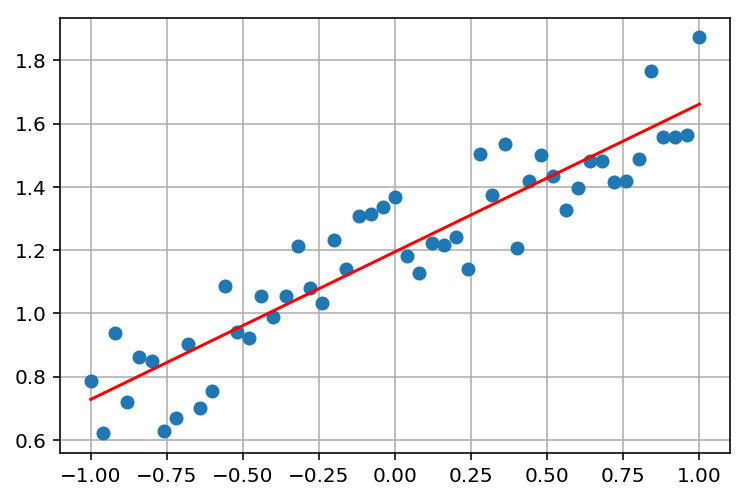

In [8]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, reg.predict(x_train.reshape(-1,1)), 'r-')
plt.grid()
plt.show()

# Stochastic Gradient Descent

1. `tf.Varaible` 선언
1. `tf.placeholder` 선언
1. loss function(손실함수) 선언
1. Hyper-Parameter 설정(learning rate, batch size)
1. 수치 최적화 알고리즘 선택
1. 학습용 데이터 골고루 섞어주기
1. Batch마다 Weight(`w`,`b`) 업데이트

In [9]:
from helper import generate_batches
# TODO 1
w = tf.Variable(-1.0, dtype=tf.float32)
b = tf.Variable(-1.0, dtype=tf.float32)

# TODO 2
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# TODO 3
loss = tf.reduce_mean(tf.square(w * x + b - y))

# TODO 4
batch_size = 10
lr = 0.15

# TODO 5
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

np.random.seed(320)
# TODO 6
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = x_train[shuffled_id]
shuffled_y_train = y_train[shuffled_id]
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(25):
        if epoch % 5 == 0:
            curr_w, curr_b, curr_loss = sess.run([w, b, loss], feed_dict={x:x_train, y:y_train})
            print(curr_w, curr_b, curr_loss)
        # TODO 7
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})
    
    w_tf_sgd, b_tf_sgd = sess.run([w, b])

-1.0 -1.0 5.577501
0.41015092 1.1740253 0.01503403
0.4804343 1.1854436 0.013628693
0.48354942 1.1859481 0.013651733
0.48368746 1.1859704 0.013652924


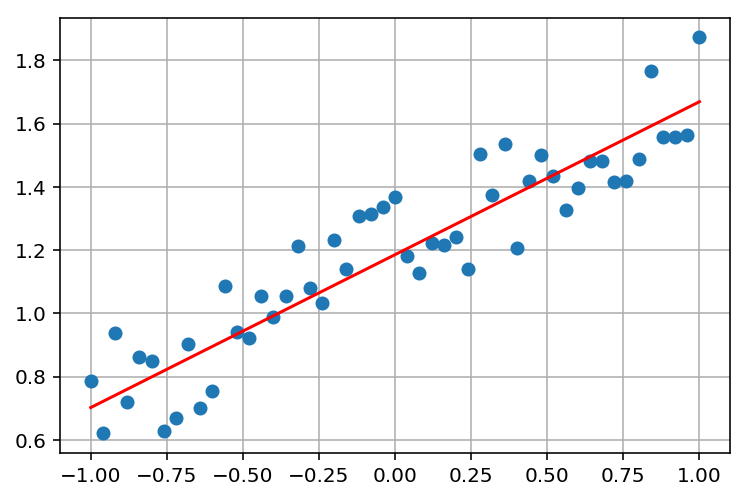

In [10]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, w_tf_sgd * x_train + b_tf_sgd, 'r-')
plt.grid()
plt.show()